## Notebook to fix the init file for meridional velocities

In [38]:
import xarray as xr
import numpy as np

### Import data

In [39]:
path = f'/Users/iriskeizer/Documents/ROMS/data/lateral forcing/NorthSea4 SODA'

init = xr.open_dataset(f'{path}/NorthSea4_init_SODA_1980116_to_20201216.nc')
clim = xr.open_dataset(f'{path}/NorthSea4_clim_SODA_1980116_to_20201216.nc')
bry = xr.open_dataset(f'{path}/NorthSea4_bry_SODA_1980116_to_20201216.nc')
grid = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/grid/NorthSea4_smooth01_sponge_nudg.nc')

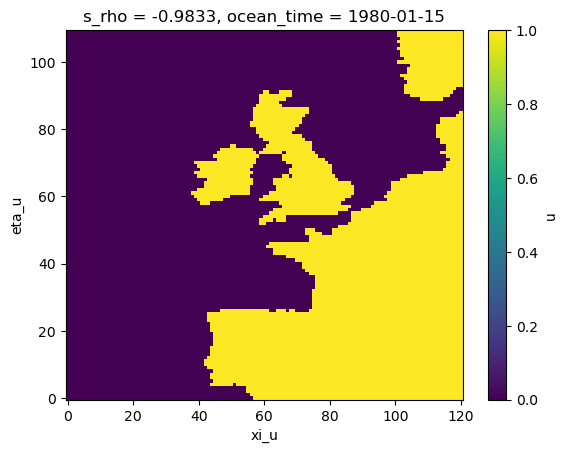

In [40]:
init.u.isnull().isel(s_rho=0).plot()

### Plot original data

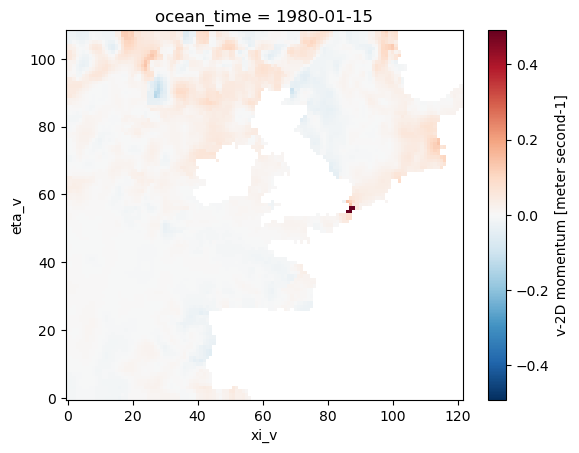

In [41]:
init.vbar.plot()

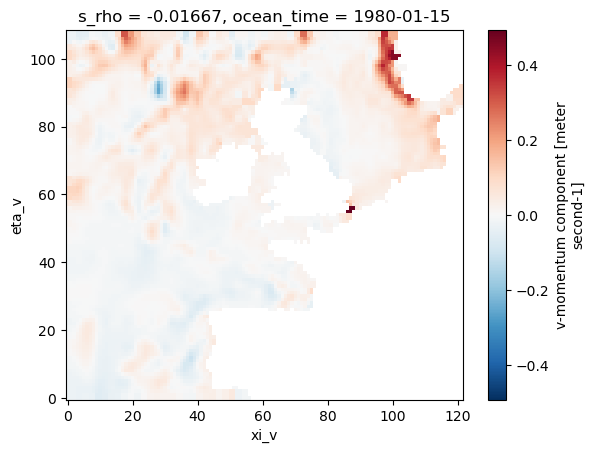

In [42]:
init.v.isel(s_rho = -1).plot()

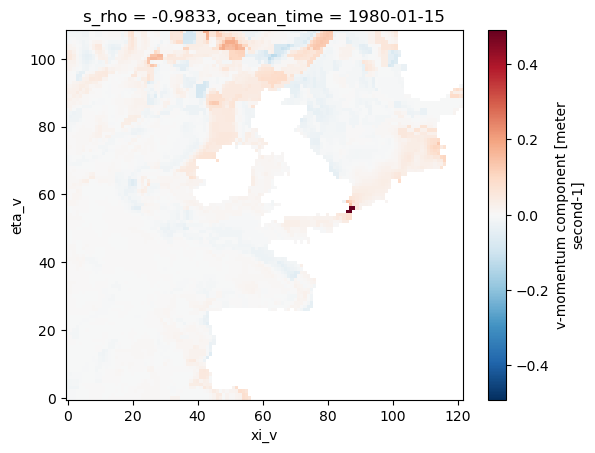

In [43]:
init.v.isel(s_rho = 0).plot()

### Change ROMS fill value to -10

In [44]:
init['v'] = init.v.where(grid.mask_v == 1, -10)
init['vbar'] = init.vbar.where(grid.mask_v == 1, -10)

clim['v'] = clim.v.where(grid.mask_v == 1, -10)
clim['vbar'] = clim.vbar.where(grid.mask_v == 1, -10)

bry['v_west'] = bry.v_west.where(grid.mask_v.isel(xi_v=0) == 1, -10)
bry['v_east'] = bry.v_east.where(grid.mask_v.isel(xi_v=-1) == 1, -10)
bry['v_north'] = bry.v_north.where(grid.mask_v.isel(eta_v=-1) == 1, -10)
bry['v_south'] = bry.v_south.where(grid.mask_v.isel(eta_v=0) == 1, -10)

bry['vbar_west'] = bry.vbar_west.where(grid.mask_v.isel(xi_v=0) == 1, -10)
bry['vbar_east'] = bry.vbar_east.where(grid.mask_v.isel(xi_v=-1) == 1, -10)
bry['vbar_north'] = bry.vbar_north.where(grid.mask_v.isel(eta_v=-1) == 1, -10)
bry['vbar_south'] = bry.vbar_south.where(grid.mask_v.isel(eta_v=0) == 1, -10)



### Add cap to meridional velocities

In [45]:
cap = 0.4

In [46]:
init['v'] = init.v.where(init.v < cap, cap)
init['vbar'] = init.vbar.where(init.vbar < cap, cap)

clim['v'] = clim.v.where(clim.v < cap, cap)
clim['vbar'] = clim.vbar.where(clim.vbar < cap, cap)

bry['v_west'] = bry.v_west.where(bry.v_west < cap, cap)
bry['v_east'] = bry.v_east.where(bry.v_east < cap, cap)
bry['v_north'] = bry.v_north.where(bry.v_north < cap, cap)
bry['v_south'] = bry.v_south.where(bry.v_south < cap, cap)

bry['vbar_west'] = bry.vbar_west.where(bry.vbar_west < cap, cap)
bry['vbar_east'] = bry.vbar_east.where(bry.vbar_east < cap, cap)
bry['vbar_north'] = bry.vbar_north.where(bry.vbar_north < cap, cap)
bry['vbar_south'] = bry.vbar_south.where(bry.vbar_south < cap, cap)



### Change back to ROMS fill value

In [52]:
init['v'] = init.v.where(grid.mask_v == 1, -9.99e33)
init['vbar'] = init.vbar.where(grid.mask_v == 1, -9.99e33)

clim['v'] = clim.v.where(grid.mask_v == 1, -9.99e33)
clim['vbar'] = clim.vbar.where(grid.mask_v == 1, -9.99e33)

bry['v_west'] = bry.v_west.where(grid.mask_v.isel(xi_v=0) == 1, -9.99e33)
bry['v_east'] = bry.v_east.where(grid.mask_v.isel(xi_v=-1) == 1, -9.99e33)
bry['v_north'] = bry.v_north.where(grid.mask_v.isel(eta_v=-1) == 1, -9.99e33)
bry['v_south'] = bry.v_south.where(grid.mask_v.isel(eta_v=0) == 1, -9.99e33)

bry['vbar_west'] = bry.vbar_west.where(grid.mask_v.isel(xi_v=0) == 1, -9.99e33)
bry['vbar_east'] = bry.vbar_east.where(grid.mask_v.isel(xi_v=-1) == 1, -9.99e33)
bry['vbar_north'] = bry.vbar_north.where(grid.mask_v.isel(eta_v=-1) == 1, -9.99e33)
bry['vbar_south'] = bry.vbar_south.where(grid.mask_v.isel(eta_v=0) == 1, -9.99e33)



# Add attrs
init.vbar.attrs['_FillValue'] = -9.99e33
init.v.attrs['_FillValue'] = -9.99e33

clim.vbar.attrs['_FillValue'] = -9.99e33
clim.v.attrs['_FillValue'] = -9.99e33

bry.v_west.attrs['_FillValue'] = -9.99e33
bry.v_east.attrs['_FillValue'] = -9.99e33
bry.v_south.attrs['_FillValue'] = -9.99e33
bry.v_north.attrs['_FillValue'] = -9.99e33
bry.vbar_west.attrs['_FillValue'] = -9.99e33
bry.vbar_east.attrs['_FillValue'] = -9.99e33
bry.vbar_south.attrs['_FillValue'] = -9.99e33
bry.vbar_north.attrs['_FillValue'] = -9.99e33

### Save data

In [11]:
bry.nbytes

117278752

In [12]:
init.to_netcdf(f'{path}/NorthSea4_init_vcorr_SODA_1980116_to_20201216.nc')
clim.to_netcdf(f'{path}/NorthSea4_clim_vcorr_SODA_1980116_to_20201216.nc')
bry.to_netcdf(f'{path}/NorthSea4_bry_vcorr_SODA_1980116_to_20201216.nc')

### Plot data

In [13]:
init = xr.open_dataset(f'{path}/NorthSea4_init_vcorr_SODA_1980116_to_20201216.nc')

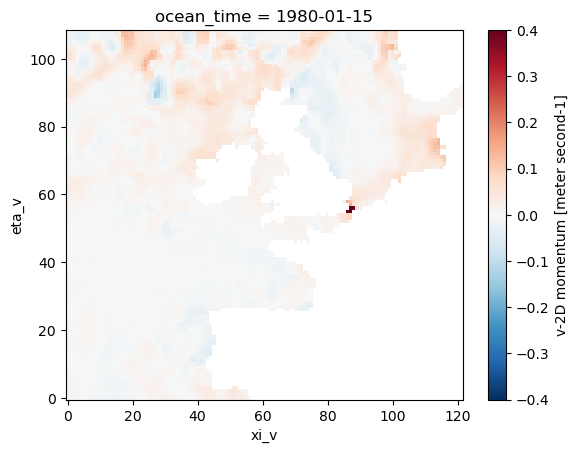

In [14]:
init.vbar.plot()

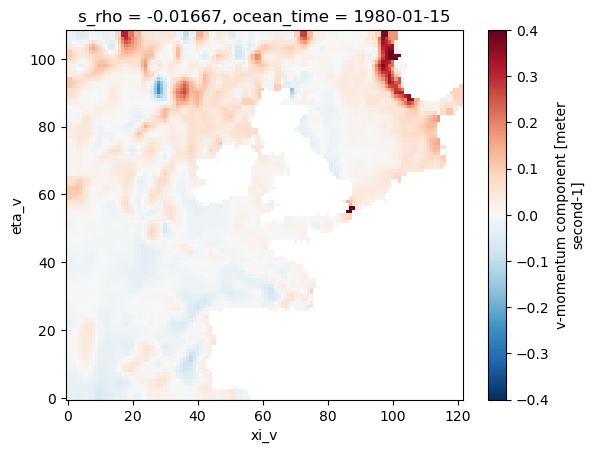

In [15]:
init.v.isel(s_rho = -1).plot()

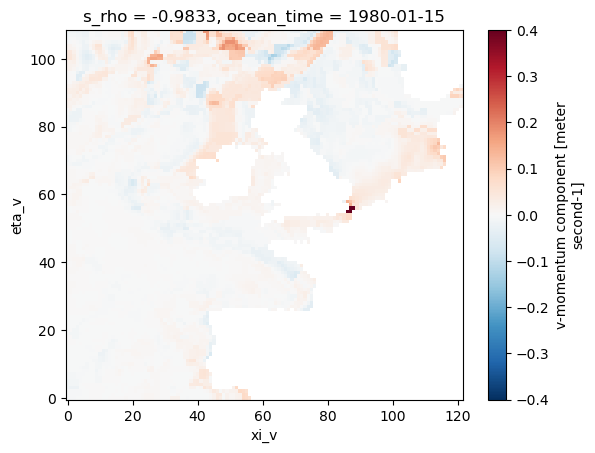

In [16]:
init.v.isel(s_rho = 0).plot()